In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [ ]:
df_features = pd.read_csv("data/train_features.csv", sep =',')
df_result = pd.read_csv("data/train_salaries.csv", sep =',')
df_features['salary'] = pd.Series(df_result['salary'])

In [ ]:
df_features

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


In [ ]:
#check total NA values for each columns
print("Feature  \t\t Nan Count   \t Pct")
for i,c in df_features.T.iterrows():
    count = sum(c.isna())
    count = float(count)
    if count >0:   
        print("%s   \t%5d   \t%.2f%%"  %(i, count, (count/1000000)*100))

Feature  		 Nan Count   	 Pct


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


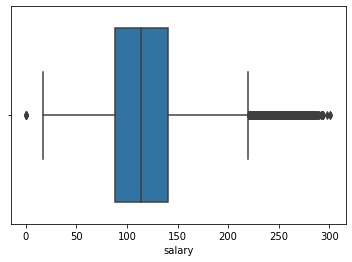

In [ ]:
import seaborn as sns
sns.boxplot(x=df_features['salary'])

In [ ]:
df_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
yearsExperience,1000000.0,11.992386,7.212391,0.0,6.0,12.0,18.0,24.0
milesFromMetropolis,1000000.0,49.529260,28.877733,0.0,25.0,50.0,75.0,99.0
salary,1000000.0,116.061818,38.717936,0.0,88.0,114.0,141.0,301.0


In [ ]:
#count number of rows which have salary > 220 and < 10 (outliers)
df_features[(df_features['salary']>230)]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
966,JOB1362684408653,COMP32,CEO,DOCTORAL,ENGINEERING,FINANCE,23,11,247
1211,JOB1362684408898,COMP24,CTO,DOCTORAL,BUSINESS,FINANCE,5,46,232
1413,JOB1362684409100,COMP56,VICE_PRESIDENT,MASTERS,MATH,WEB,24,15,241
...,...,...,...,...,...,...,...,...,...
998246,JOB1362685405933,COMP16,CEO,MASTERS,BUSINESS,OIL,13,32,243
998421,JOB1362685406108,COMP46,CFO,DOCTORAL,BUSINESS,FINANCE,19,4,235
998446,JOB1362685406133,COMP46,CFO,MASTERS,ENGINEERING,WEB,21,0,247
999670,JOB1362685407357,COMP20,CEO,DOCTORAL,LITERATURE,SERVICE,24,14,233


In [ ]:
from scipy import stats
#constraints = df_features[(np.abs(stats.zscore(df_features)) < 3)].all(axis=1)
z = np.abs(stats.zscore(df_features['salary']))
#print(np.count_nonzero(np.where(z > 3)))

In [ ]:
#df_features.drop(df_features[(np.abs(stats.zscore(df_features['salary'])) < 3].all(axis=1), inplace=True)
df_features.drop(df_features.index[np.where(z > 3)], inplace=True)

In [ ]:
df_features['jobType'].unique()

array(['CFO', 'CEO', 'VICE_PRESIDENT', 'MANAGER', 'JUNIOR', 'JANITOR',
       'CTO', 'SENIOR'], dtype=object)

In [ ]:
df_features['degree'].unique()

array(['MASTERS', 'HIGH_SCHOOL', 'DOCTORAL', 'BACHELORS', 'NONE'],
      dtype=object)

In [ ]:
df_features['major'].unique()

array(['MATH', 'NONE', 'PHYSICS', 'CHEMISTRY', 'COMPSCI', 'BIOLOGY',
       'LITERATURE', 'BUSINESS', 'ENGINEERING'], dtype=object)

In [ ]:
df_features['industry'].unique()

array(['HEALTH', 'WEB', 'AUTO', 'FINANCE', 'EDUCATION', 'OIL', 'SERVICE'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

lblencoder = LabelEncoder()
# Assigning numerical values and storing in another column - dummy
df_features['jobType_cat'] = lblencoder.fit_transform(df_features['jobType'])
df_features['degree_cat'] = lblencoder.fit_transform(df_features['degree'])
df_features['major_cat'] = lblencoder.fit_transform(df_features['major'])
df_features['industry_cat'] = lblencoder.fit_transform(df_features['industry'])

In [ ]:
df_features

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,jobType_cat,degree_cat,major_cat,industry_cat
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,1,3,6,3
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,0,2,7,6
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,7,1,8,3
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,5,1,2,0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,7,0,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88,7,0,2,3
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160,2,2,7,2
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64,4,2,7,1
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149,1,3,7,3


In [ ]:
df_features.loc[df_features['degree_cat'] == 4]


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,jobType_cat,degree_cat,major_cat,industry_cat
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178,1,4,7,3
12,JOB1362684407699,COMP4,JUNIOR,NONE,NONE,OIL,8,29,79,4,4,7,4
14,JOB1362684407701,COMP57,JANITOR,NONE,NONE,AUTO,21,81,47,3,4,7,0
20,JOB1362684407707,COMP44,JANITOR,NONE,NONE,SERVICE,11,96,32,3,4,7,5
21,JOB1362684407708,COMP20,JUNIOR,NONE,NONE,AUTO,14,62,68,4,4,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999977,JOB1362685407664,COMP28,CFO,NONE,NONE,HEALTH,12,46,142,1,4,7,3
999978,JOB1362685407665,COMP53,VICE_PRESIDENT,NONE,NONE,SERVICE,18,94,93,7,4,7,5
999984,JOB1362685407671,COMP1,CTO,NONE,NONE,SERVICE,6,20,110,2,4,7,5
999985,JOB1362685407672,COMP62,CEO,NONE,NONE,AUTO,5,13,147,0,4,7,0


Slight positive correlation between Salary and years of experience, and slight negative correlation between salary and distance from metropolis.

Job Type are typically highest (and larger range) for Cat 0, 1, 2 (CEO, CFO, CTO), and low/shorter range for Cat 3 (Janitor). Slightly better is cat 4 (junior). The other groups (Manager, Senior, and VP) are like at the medium to high range.

For degree, people that only have highschool degree will have lowest starting point for salary, and in contrast, the doctoral degree has highest salary starting point.

None degree also yields lower salary


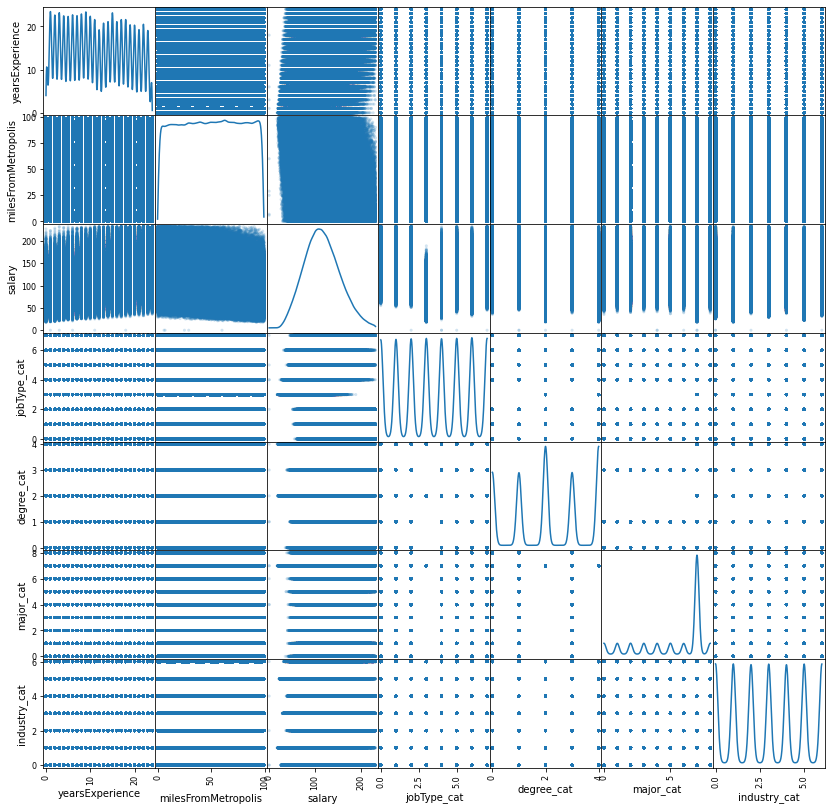

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_features, alpha=0.2, figsize=(14, 14), diagonal='kde');

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test = train_test_split(df_features, test_size=0.2, random_state=10)
y_train = X_train['salary']
y_test = X_test['salary']
X_train = X_train.drop(['salary', 'industry', 'jobId', 'companyId', 'jobType', \
                        'degree', 'major', 'industry', 'major_cat'], axis=1)
X_test = X_test.drop(['salary', 'industry', 'jobId', 'companyId', 'jobType', \
                        'degree', 'major', 'industry', 'major_cat'], axis=1)

#jobId	companyId	jobType	degree	major	industry

In [ ]:
Y = df_features['salary']
X = df_features.drop(['salary', 'industry', 'jobId', 'companyId', 'jobType', \
                        'degree', 'major', 'industry', 'major_cat'], axis=1)


Gradient boosting (tree-based learning)

In [ ]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2'],
    'learning_rate': [0.01],
    'feature_fraction': 0.5,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 256,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

In [ ]:
lgbm = lgb.LGBMRegressor(**hyper_params)

In [ ]:
lgbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1200)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l1: 30.5599	valid_0's l2: 1434.52
Training until validation scores don't improve for 1200 rounds.
[2]	valid_0's l1: 30.4698	valid_0's l2: 1426.03
[3]	valid_0's l1: 30.3956	valid_0's l2: 1419.06
[4]	valid_0's l1: 30.2614	valid_0's l2: 1406.53
[5]	valid_0's l1: 30.2104	valid_0's l2: 1401.7
[6]	valid_0's l1: 30.0844	valid_0's l2: 1390.15
[7]	valid_0's l1: 30.0185	valid_0's l2: 1383.96
[8]	valid_0's l1: 29.932	valid_0's l2: 1375.94
[9]	valid_0's l1: 29.8608	valid_0's l2: 1369.35
[10]	valid_0's l1: 29.7312	valid_0's l2: 1357.45
[11]	valid_0's l1: 29.6469	valid_0's l2: 1349.7
[12]	valid_0's l1: 29.5973	valid_0's l2: 1345.1
[13]	valid_0's l1: 29.4761	valid_0's l2: 1334.22
[14]	valid_0's l1: 29.4081	valid_0's l2: 1328.02
[15]	valid_0's l1: 29.3264	valid_0's l2: 1320.59
[16]	valid_0's l1: 29.2602	valid_0's l2: 1314.58
[17]	valid_0's l1: 29.1948	valid_0's l2: 1308.65
[18]	valid_0's l1: 29.0696	valid_0's l2: 1297.43
[19]	valid_0's l1: 28.9464	valid_0's l2: 1286.43
[20]	valid_0's l1:

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=[0.01], max_bin=512,
              max_depth=8, metric=['l2'], min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
              n_jobs=-1, num_iterations=100000, num_leaves=256,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, task='train',
              verbose=0)

In [ ]:
y_pred = lgbm.predict(X_train, num_iteration=lgbm.best_iteration_)

In [ ]:
from sklearn.metrics import mean_squared_error
print('The RMSE of prediction is:', mean_squared_error(y_pred, y_train, squared=False))

The RMSE of prediction is: 19.16843272420423


In [ ]:
y_test_pred = lgbm.predict(X_test, num_iteration=lgbm.best_iteration_)

In [ ]:
from sklearn.metrics import mean_squared_error
print('The RMSE of prediction on test is:', mean_squared_error(y_test_pred, y_test, squared=False))

The RMSE of prediction on test is: 19.271590994689575


Elastic Net Regression


In [ ]:
from sklearn.linear_model import ElasticNet

alphas = [0.0001, 0.001, 0.01, 0.1, 0.3]

for a in alphas:
    model = ElasticNet(alpha=a).fit(X,Y)   
    score = model.score(X, Y)
    pred_y = model.predict(X)
    mse = mean_squared_error(Y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.34, MSE:959.78, RMSE:30.98
Alpha:0.0010, R2:0.34, MSE:959.78, RMSE:30.98
Alpha:0.0100, R2:0.34, MSE:959.78, RMSE:30.98
Alpha:0.1000, R2:0.34, MSE:959.86, RMSE:30.98
Alpha:0.3000, R2:0.34, MSE:960.46, RMSE:30.99


In [ ]:
elastic=ElasticNet(alpha=0.0001).fit(X_train, y_train)
y_pred = elastic.predict(X_test)
score = elastic.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.337, MSE:961.08, RMSE:31.00


In [ ]:
df = pd.read_csv('train.csv')